# Rede Neural para Classificação com Dados Múltiplos
Este notebook implementa e treina uma rede neural simples para uma tarefa de classificação com múltiplas classes (4 no total), utilizando uma arquitetura `ReLU → ReLU → Softmax`.

In [22]:
import numpy as np
from ann import initialize_layers, feed_forward
from backpropagation import backpropagation
from prepareData.prepareDataMultipleClassification import prepareDataMultipleClassification
from cost import cost_funcs
from training import train
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Configuração da Rede Neural
Aqui definimos a arquitetura da rede e a inicialização das camadas.

In [8]:
input_size = 20

layers = [
    {'neurons': 10, 'activation_function': 'relu'},
    {'neurons': 10, 'activation_function': 'relu'},
    {'neurons': 4, 'activation_function': 'softmax'}
]

ann_layer = initialize_layers(layers, c_inputs=input_size)

## Preparação dos Dados
Utilizamos uma função auxiliar para carregar os dados de treino e teste.

### As classes preditas são:
0 - low cost

1 - medium cost

2 - high cost

3 - very high cost

In [9]:
x_train, x_test, y_train, y_test = prepareDataMultipleClassification()

print("Dados de entrada:")
print(x_train.columns.tolist())
print()

print("Dados de saída:")
print(y_train.columns.tolist())
print()

print("Shape dos dados:")
print(f"x_train: {x_train.shape}, y_train: {np.array(y_train).shape}")
print(f"x_test:  {x_test.shape},  y_test:  {np.array(y_test).shape}")

Dados de entrada:
['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']

Dados de saída:
['price_0', 'price_1', 'price_2', 'price_3']

Shape dos dados:
x_train: (1600, 20), y_train: (1600, 4)
x_test:  (400, 20),  y_test:  (400, 4)


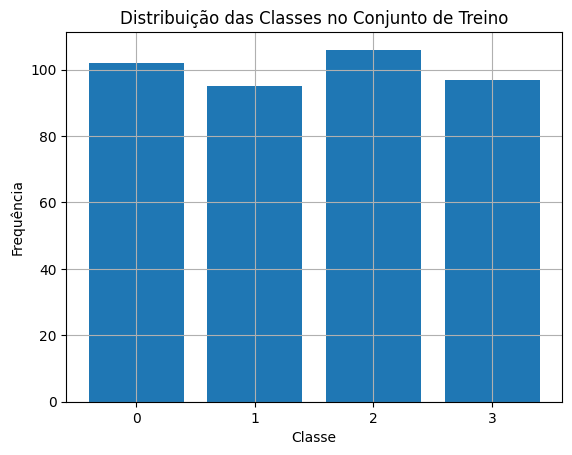

In [15]:

y_labels = np.argmax(y_test, axis=1)
plt.hist(y_labels, bins=np.arange(5)-0.5, rwidth=0.8)
plt.title("Distribuição das Classes no Conjunto de Treino")
plt.xlabel("Classe")
plt.ylabel("Frequência")
plt.xticks([0, 1, 2, 3])
plt.grid(True)
plt.show()

## Treinamento da Rede Neural
Treinamos a rede por 10 épocas utilizando a função de custo `categorical_cross_entropy` e uma taxa de aprendizado de `0.002`.

In [10]:
ann = train(
    ann=ann_layer,
    epochs=10,
    x=x_train,
    y=np.array(y_train),
    learning_rate=0.002,
    cost_func_name='categorical_cross_entropy'
)

## Avaliação do Modelo
Função para avaliar a acurácia utilizando o conjunto de testes e apresentando os resultados com a função `classification_report` e `confusion_matrix` do `sklearn`.

In [25]:
def evaluate(ann, x, y):
    predictions = []
    for observation_id in range(len(x)):
        input = np.array(x.iloc[observation_id])
        prediction, _ = feed_forward(ann, input)
        one_hot_prediction = np.zeros_like(prediction)
        one_hot_prediction[np.argmax(prediction)] = 1
        predictions.append(one_hot_prediction)
    
    print("\n Resultados da Classificação:")
    print(classification_report(y, predictions))
    
    y_true_matrix = np.argmax(y, axis=1)
    y_pred_matrix = np.argmax(predictions, axis=1)

    cm = confusion_matrix(y_true_matrix, y_pred_matrix)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title("Matriz de Confusão")
    plt.show()


 Resultados da Classificação:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       102
           1       0.94      0.65      0.77        95
           2       0.73      0.86      0.79       106
           3       0.86      0.94      0.90        97

   micro avg       0.85      0.85      0.85       400
   macro avg       0.87      0.85      0.85       400
weighted avg       0.87      0.85      0.85       400
 samples avg       0.85      0.85      0.85       400



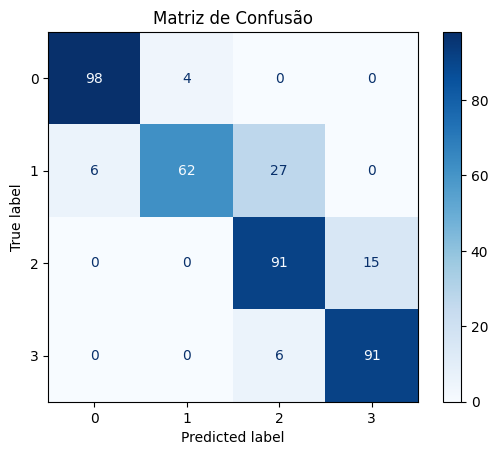

In [26]:
evaluate(ann, x_test, y_test)

# Exemplo de Predições

In [28]:
for i in range(2):
    input_vector = np.array(x_test.iloc[i])
    y_true = np.argmax(y_test.iloc[i])
    y_pred, _ = feed_forward(ann, input_vector)
    y_pred_label = np.argmax(y_pred)
    confidence = np.max(y_pred)

    print(f"Exemplo {i+1}")
    print()
    print(f"Entrada (vetor de características):\n{np.round(input_vector, 3)}\n")
    print(f"Classe verdadeira: {y_true}")
    print(f"Classe predita:    {y_pred_label}")
    print(f"Confiança da predição: {confidence:.2f}")
    print(f"Vetor de saída (softmax): {np.round(y_pred, 3)}")
    print("\n")


Exemplo 1

Entrada (vetor de características):
[0.509 1.    0.36  1.    0.053 1.    0.484 0.333 0.192 0.143 0.1   0.209
 0.096 0.833 0.929 0.722 0.444 1.    1.    0.   ]

Classe verdadeira: 3
Classe predita:    3
Confiança da predição: 0.65
Vetor de saída (softmax): [0.001 0.036 0.311 0.652]


Exemplo 2

Entrada (vetor de características):
[0.131 0.    0.88  1.    0.263 1.    0.29  0.333 0.775 0.143 0.3   0.244
 0.652 0.001 0.5   0.333 0.111 1.    1.    1.   ]

Classe verdadeira: 0
Classe predita:    0
Confiança da predição: 0.80
Vetor de saída (softmax): [0.8   0.182 0.019 0.   ]


